In [108]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [105]:
# read the data
df = pd.read_csv('weather_data/weather_data.csv', index_col='Date', parse_dates=True)

In [106]:
df.head()

,Month,Week,Year,City,Code,Location,State,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
Date,,,,,,,,,,,,,
2016-03-01,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33,0.00
2016-03-01,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86,0.00
2016-03-01,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73,0.16
2016-03-01,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86,0.00
2016-03-01,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80,0.01


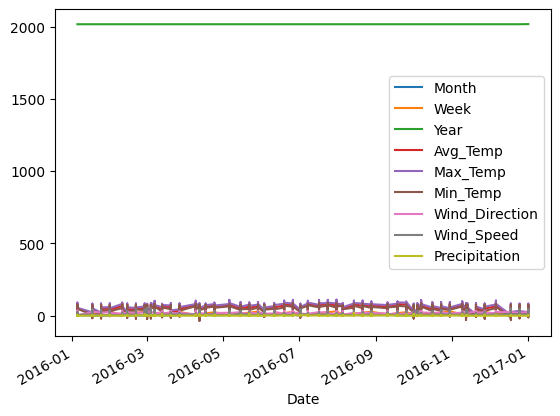

In [109]:
df.plot()
pyplot.show()

In [110]:
weather_df = df.drop(['City', 'Location', 'State', 'Code'], axis=1)
weather_df.head()

,Month,Week,Year,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
Date,,,,,,,,,
2016-03-01,1,3,2016,39,46,32,33,4.33,0.00
2016-03-01,1,3,2016,39,47,31,32,3.86,0.00
2016-03-01,1,3,2016,46,51,41,35,9.73,0.16
2016-03-01,1,3,2016,45,52,38,32,6.86,0.00
2016-03-01,1,3,2016,34,38,29,19,7.80,0.01


In [111]:
# Find NaN values in all columns and create a DataFrame of NaN counts
nan_counts = weather_df.isna().sum()

# Display the NaN counts for each column
print(nan_counts)

Month             0
Week              0
Year              0
Avg_Temp          0
Max_Temp          0
Min_Temp          0
Wind_Direction    0
Wind_Speed        0
Precipitation     0
dtype: int64


In [112]:
# preprocess the data
scaler = MinMaxScaler()

In [113]:
df_scaled = scaler.fit_transform(weather_df)
print(df_scaled)

[[0.         0.06666667 0.         ... 0.91666667 0.07086743 0.        ]
 [0.         0.06666667 0.         ... 0.88888889 0.06317512 0.        ]
 [0.         0.06666667 0.         ... 0.97222222 0.15924714 0.00765917]
 ...
 [0.         0.         1.         ... 0.72222222 0.02700491 0.        ]
 [0.         0.         1.         ... 0.66666667 0.29721768 0.00287219]
 [0.         0.         1.         ... 0.63888889 0.12291326 0.00478698]]


In [114]:
train_size = int(len(df_scaled) * 0.7)
train_data, test_data = df_scaled[0:train_size], df_scaled[train_size:]

SARIMA (Seasonal AutoRegressive Integrated Moving Average) model using the `statsmodels` library in Python. Let me break down the different components of this code:

`order=(1, 1, 1)`: This is a tuple representing the non-seasonal order of the SARIMA model. The three values `(p, d, q)` in the tuple stand for:

   - `p` (AutoRegressive order): The number of lag observations included in the model. In your case, it's 1.
   - `d` (Integrated order): The number of differences needed to make the time series stationary. In your case, it's 1.
   - `q` (Moving Average order): The number of lagged forecast errors included in the model. In your case, it's 1.

`seasonal_order=(1, 1, 1, 7)`: This is a tuple representing the seasonal order of the SARIMA model. The four values `(P, D, Q, S)` in the tuple stand for:

   - `P` (Seasonal AutoRegressive order): The number of seasonal lag observations included in the model.
   - `D` (Seasonal Integrated order): The number of seasonal differences needed to make the time series stationary.
   - `Q` (Seasonal Moving Average order): The number of seasonal lagged forecast errors included in the model.
   - `S` (Seasonal Periodicity): The number of time steps per seasonal cycle. In your case, it's 7, which suggests a weekly seasonality.

So, in summary, the code is creating a SARIMA model for the `df_scaled` time series data with non-seasonal orders (1, 1, 1) and seasonal orders (1, 1, 1, 7). This model can be used for time series forecasting and analysis, taking into account both non-seasonal and seasonal patterns in the data.

In [116]:
# Sort the DataFrame by the date index in ascending order
weather_df.sort_index(inplace=True)

model = ARIMA(train_data, order=(1,1,1))

ValueError: SARIMAX models require univariate `endog`. Got shape (11720, 9).

In [100]:
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58263D+00    |proj g|=  2.73100D-01


 This problem is unconstrained.



At iterate    5    f=  1.41239D+00    |proj g|=  1.73073D-01

At iterate   10    f=  1.37378D+00    |proj g|=  2.83305D-02

At iterate   15    f=  1.36947D+00    |proj g|=  2.59419D-03

At iterate   20    f=  1.36931D+00    |proj g|=  1.31461D-02

At iterate   25    f=  1.36816D+00    |proj g|=  1.15655D-02

At iterate   30    f=  1.36791D+00    |proj g|=  4.31551D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     50      1     0     0   4.996D-04   1.368D+00
  F =   1.3678902808770015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [102]:
# Define the start and end dates for prediction
start_date = '2023-09-01'
end_date = '2023-09-30'

# Make predictions within the specified date range
preds = model_fit.predict(start=start_date, end=end_date)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'